In [1]:
import causaltensor as ct
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from causaltensor.sample_data import fetch

In [3]:
O_raw = fetch()

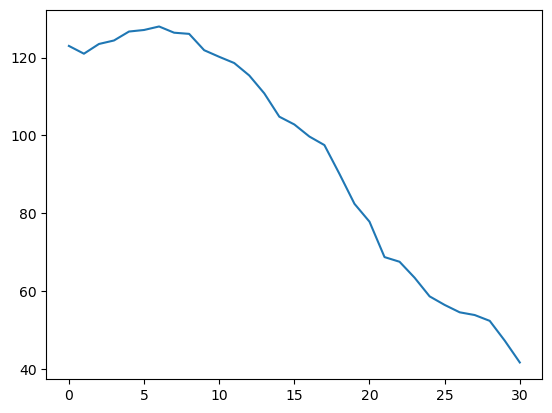

In [4]:
O = O_raw[8:, :]
O = O.T
plt.plot(O[-1, :])

In [5]:
Z = np.zeros_like(O)
Z[-1, 19:] = 1 #start to apply the treatment in 1989

In [47]:
s = np.linalg.svd(O, full_matrices=False, compute_uv=False)

2


## DID estimation

In [24]:
from causaltensor.cauest import DID 

M, tau = DID(O, Z)

In [25]:
tau

-27.335107556961784

## SDID estimation

In [26]:
from causaltensor.cauest import SDID

tau = SDID(O, Z)

In [27]:
tau

-15.602326126984691

## Matrix Completion

In [10]:
from causaltensor.cauest import MC_NNM_with_suggested_rank

M, a, b, tau = MC_NNM_with_suggested_rank(O, 1-Z, suggest_r = 1)

In [11]:
tau

-27.017712092108127

In [12]:
from causaltensor.cauest import MC_NNM_with_cross_validation

M, a, b, tau = MC_NNM_with_cross_validation(O, 1-Z)
tau

-19.936496012118933

## Debiased Convex Panel Regression

In [44]:
import causaltensor.cauest.DebiasConvex as DebiasConvex
import causaltensor.matlib.util as util

from importlib import reload
reload(DebiasConvex)
reload(util)
M, tau, std = DebiasConvex.DC_PR_with_suggested_rank(O, Z, suggest_r = 2)
#M, tau, variance = 
#M, tau, M_raw, tau_raw = DC_PR_auto_rank(O, Z)
#variance = std_debiased_convex(O, Z, M_raw, tau_raw)
#print(tau, variance)

[4275.67058863  296.24054256    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.        ]


In [45]:
M, tau, std

(array([[ 92.90513372,  96.68801754,  98.60903638, ..., 104.67474679,
         101.11459285,  97.74070071],
        [ 97.6006808 , 101.64402967, 103.43801846, ..., 112.38445752,
         108.55634776, 105.10137077],
        [121.94417995, 125.39705123, 132.81166734, ...,  84.57260549,
          81.82139686,  75.44031241],
        ...,
        [ 99.46967366, 102.9113827 , 106.93672652, ...,  90.82063481,
          87.78206696,  83.38420953],
        [135.66175831, 139.84971035, 146.97682854, ..., 106.19324625,
         102.69206713,  96.04073734],
        [116.12972249, 119.27101999, 126.80748389, ...,  75.40843196,
          72.97510725,  66.70857691]]),
 -16.010577370658766,
 3.01302063854069)

In [35]:
from causaltensor.cauest import DC_PR_with_suggested_rank
from causaltensor.cauest import non_convex_algorithm
from causaltensor.cauest import std_debiased_convex
from causaltensor.cauest import DC_PR_auto_rank




#M, tau, M_raw, tau_raw = DC_PR_with_suggested_rank(O, Z, suggest_r = 2)
M, tau, std = DC_PR_auto_rank(O, Z)
print(tau, std)

-16.010577370658766 3.01302063854069
